In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets for customer-product data
merged = pd.merge(transactions, customers, on='CustomerID')
customer_product_matrix = merged.pivot_table(index='CustomerID', columns='ProductID', values='Quantity', fill_value=0)


In [4]:

# Preprocess customer data
features = merged[['Region', 'Quantity', 'TotalValue']]
features = pd.get_dummies(features, columns=['Region'], drop_first=True)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)




In [5]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels
merged['Cluster'] = clusters

# Evaluate using DB Index
db_index = davies_bouldin_score(scaled_features, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.1107389520293363


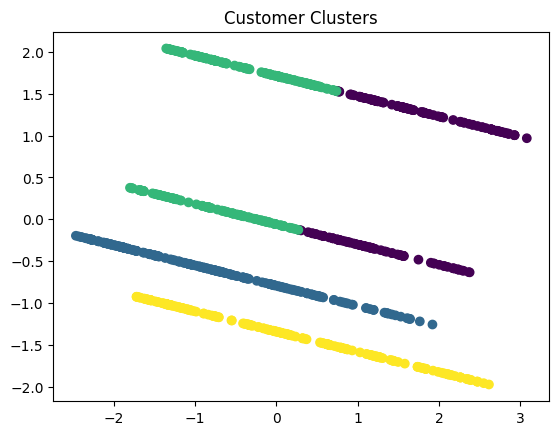

In [6]:
# Visualize clusters
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Clusters')
plt.show()